# Get to know Fernanda

Hello world!

For this Get to Know session, instead of looking at slides we will walk through a Jupyter Notebook, an application that allows editing and running code as well as displaying visuals.

## Why Jupyter for this session?

Because the use of this tool enables me to combine two passions of mine: music and data

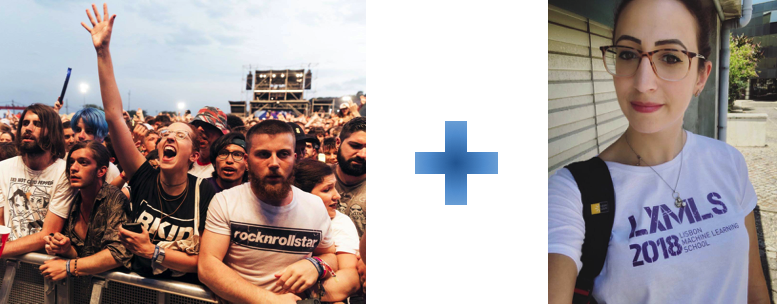

## What will we see here?

Since 2006 I use a service called Last.fm, a platform that registers ("scrobbles") every track I listen to on their system. Until now, I have over 93,000 songs registered, and it represents a lot of who I am and my trajectory.

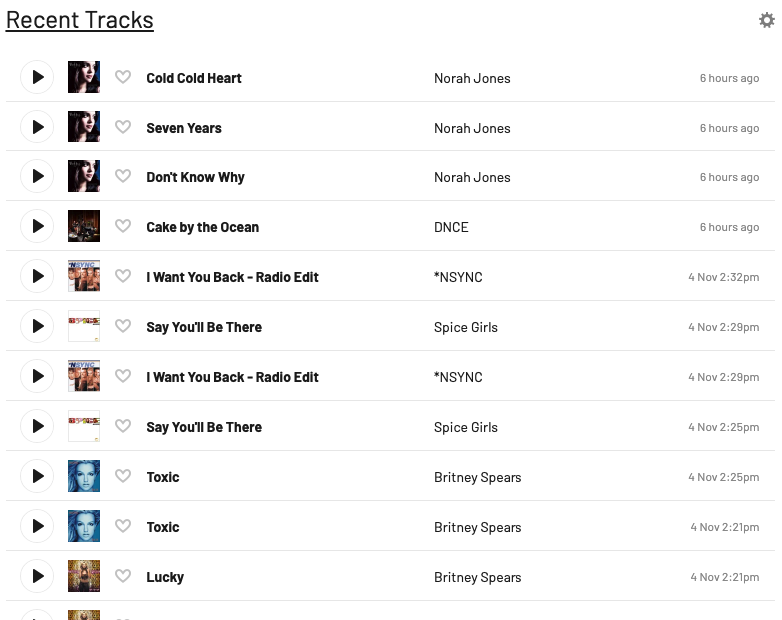

I never knew why I was scrobbling everything I listened to, I just did, and kind of obsessively. After I started working with data I realized that I could combine both to understand my taste, its evolution and how what I listened to could illustrate a little bit of my life.

### Let's go to the geeky part! 🤓

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import datetime
import csv
from os import listdir, makedirs
from os.path import isfile, join, exists
import shutil
import datetime
from pytz import timezone
import numpy as np

In [2]:
user = 'ohhrosie'

directory = 'export_' + str(user) + '/'
name_file = 'historical_tracks_'

def get_last_file(user, mypath, name_file):
    if not exists(mypath):
        makedirs(mypath)
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))
                                            if str(name_file) + str(user) in join(mypath, f)
                                            if 'partial' not in join(mypath, f)]
    if onlyfiles == []:
        return None
    else:
        return max(onlyfiles)

In [3]:
file = get_last_file(user, directory, name_file)

if file == None:
    print('No file found.')

df = pd.read_csv(directory + file, sep=',')

In [4]:
br = timezone('America/Sao_Paulo')
sp = timezone('Europe/Madrid')

date_moved = int(datetime.datetime(2017,2,6,0,0).timestamp())

list_date_formatted = []

for i in range(len(df)):
    date_epoch = int(df.iloc[i]['date'])
    if user == 'fergomes' and int(date_epoch) > date_moved:
        date_f = datetime.datetime.fromtimestamp(int(date_epoch), tz=sp)
    else:
        date_f = datetime.datetime.fromtimestamp(int(date_epoch), tz=br)
    list_date_formatted.append(date_f)

df['date_formatted'] = list_date_formatted
df['weekday'] = [datetime.date(idx.year, idx.month, idx.day).strftime('%A') for idx in df['date_formatted']]
df['weekday_num'] = [datetime.date(idx.year, idx.month, idx.day).isoweekday() for idx in df['date_formatted']]
df['hour'] = [idx.hour for idx in df['date_formatted']]
df['month'] = [idx.month for idx in df['date_formatted']]
df['year'] = [idx.year for idx in df['date_formatted']]

In [5]:
df.columns

Index(['#scrobble', 'date', 'date_fmt', 'mbid', 'artist', 'track', 'album',
       'loved', 'tags', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'date_formatted', 'weekday', 'weekday_num', 'hour',
       'month', 'year'],
      dtype='object')

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


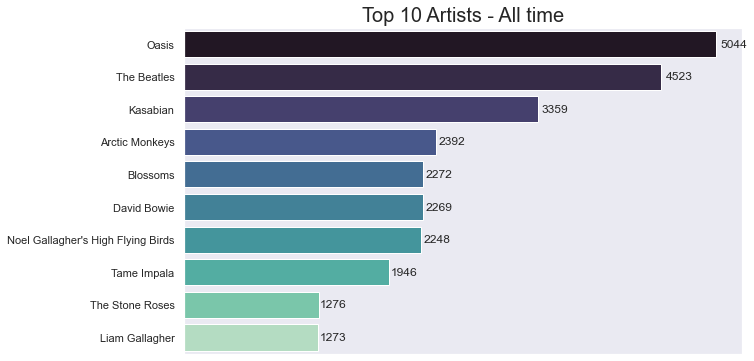

In [6]:
def plot_top(x, y):
    sns.set()
    plt.subplots(figsize=(10, 6))

    palette = sns.cubehelix_palette(15, start=-.8, rot=0.2, reverse=True)

    artists_plot = sns.barplot(y, x, palette='mako')
    artists_plot.axes.get_xaxis().set_visible(False)
    artists_plot.set_title('Top 10 Artists - All time', fontsize=20)
    for p in artists_plot.patches:
        artists_plot.text(p.get_width() * 1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
                fontsize=12, ha='left', va='center')
        
top_artists = Counter(df['artist'])
top_100_artists = top_artists.most_common(100)

x_artists = [item[0] for item in top_100_artists][:10]
y_artists = [item[1] for item in top_100_artists][:10]

plot_top(x_artists, y_artists)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


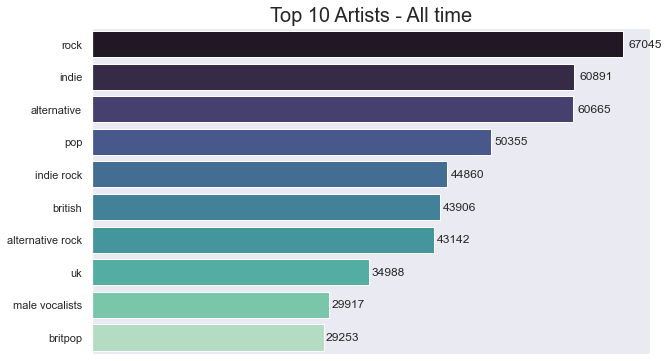

In [7]:
import ast

tags_df = df['tags']
count_tags = {}

for i in range(len(df)):
    str1 = ast.literal_eval(tags_df.iloc[i])
    for j in range(len(str1)):
        if str1[j] not in count_tags:
            count_tags[str1[j]] = 1
        elif str1[j] in count_tags:
            count_tags[str1[j]] += 1
            
top_tags = Counter(count_tags)
top_100_tags = top_tags.most_common(100)

x_tags = [item[0] for item in top_100_tags][:10]
y_tags = [item[1] for item in top_100_tags][:10]

plot_top(x_tags, y_tags)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


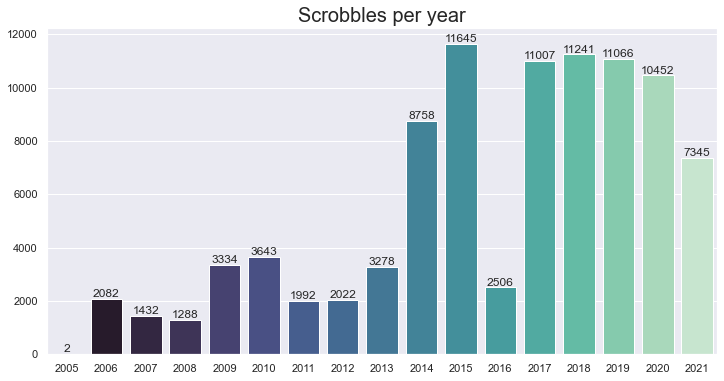

In [8]:
years = sorted(list(df['year'].unique()))
tracks_per_year = [len(df[df['year'] == i]) for i in years]

sns.set()
plt.subplots(figsize=(12, 6))
yearly_tracks = sns.barplot(years, tracks_per_year, palette='mako')
yearly_tracks.set_title('Scrobbles per year', fontsize=20)
for p in yearly_tracks.patches:
    yearly_tracks.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

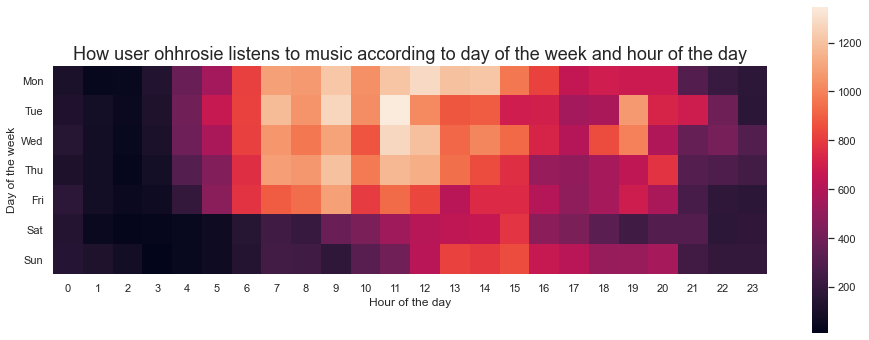

In [9]:
matrix_hour_weekday = df.pivot_table(index='weekday_num', 
               columns='hour',
               aggfunc='size',
               fill_value=0)

f, ax = plt.subplots(figsize=(16, 6))
heatmat_hour_weekday = sns.heatmap(matrix_hour_weekday, square=True,
                                   yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

title = 'How user ' + str(user) + ' listens to music according to day of the week and hour of the day'
heatmat_hour_weekday.set_title(title, fontsize=18)
plt.yticks(rotation=0)
plt.xlabel('Hour of the day')
plt.ylabel('Day of the week')
plt.show()

## Yearly view

I have a very diverse background, and to show this we'll combine with what I was listening to over the years.

### 2006-2008: the Physics years

I have a Bachelor degree in Physics (with a "minor" in Astrophysics). In this period, I was started an internship in a brokerage house and didn't have much time to listen to music, but the time I had I used to discover new bands.

Also, in this period we still didn't have smartphones, and I listened to everything on my iPod! I was always commuting and had to check for new bands on my computer, download the music, add to my iPod etc etc etc. Oh those were the days!

In [10]:
d6 = df[df.year == 2006]
d7 = df[df.year == 2007]
d8 = df[df.year == 2008]

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


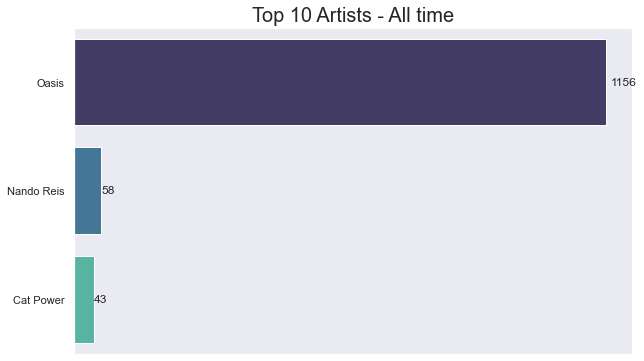

In [11]:
top_artists = Counter(d6['artist'])
top_3_artists = top_artists.most_common(3)

x_artists = [item[0] for item in top_3_artists]
y_artists = [item[1] for item in top_3_artists]

plot_top(x_artists, y_artists)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


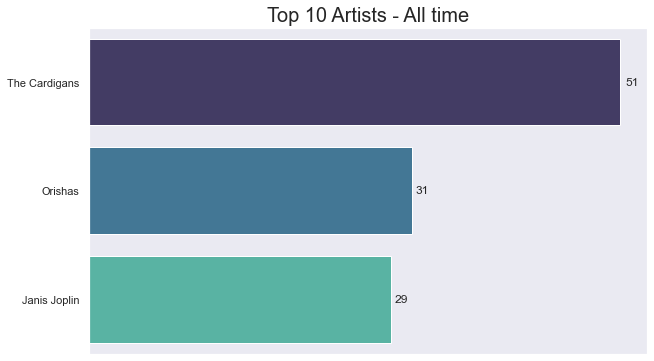

In [12]:
top_artists = Counter(d7['artist'])
top_3_artists = top_artists.most_common(3)

x_artists = [item[0] for item in top_3_artists]
y_artists = [item[1] for item in top_3_artists]

plot_top(x_artists, y_artists)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


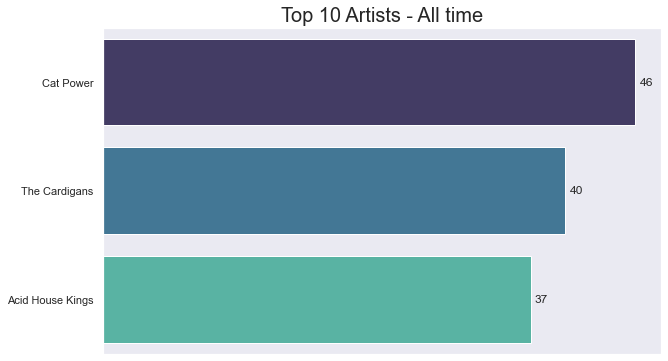

In [13]:
top_artists = Counter(d8['artist'])
top_3_artists = top_artists.most_common(3)

x_artists = [item[0] for item in top_3_artists]
y_artists = [item[1] for item in top_3_artists]

plot_top(x_artists, y_artists)

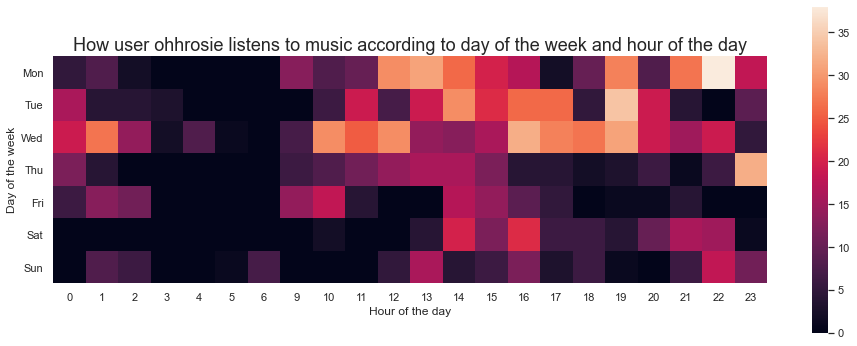

In [14]:
matrix_hour_weekday = d7.pivot_table(index='weekday_num', 
               columns='hour',
               aggfunc='size',
               fill_value=0)

f, ax = plt.subplots(figsize=(16, 6))
heatmat_hour_weekday = sns.heatmap(matrix_hour_weekday, square=True,
                                   yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

title = 'How user ' + str(user) + ' listens to music according to day of the week and hour of the day'
heatmat_hour_weekday.set_title(title, fontsize=18)
plt.yticks(rotation=0)
plt.xlabel('Hour of the day')
plt.ylabel('Day of the week')
plt.show()

In [15]:
d7

,#scrobble,date,date_fmt,mbid,artist,track,album,loved,tags,danceability,...,instrumentalness,liveness,valence,tempo,date_formatted,weekday,weekday_num,hour,month,year
2084,2085,1168226739,2007-01-08 03:25:39,0287ed60-c9e3-37eb-b226-16142352cf2d,Panic! at the Disco,But It's Better If You Do,A Fever You Can't Sweat Out,0,"['rock', 'alternative', 'emo', 'pop punk', 'in...",0.467,...,0.000000,0.2900,0.674,170.036,2007-01-08 01:25:39-02:00,Monday,1,1,1,2007
2085,2086,1168227045,2007-01-08 03:30:45,3215ec5c-9847-360c-b4dd-ff726882485a,Pedra Branca,Feijoada Polifônica,NaN,0,"['chillout', 'ambient', 'world fusion', 'world...",0.714,...,0.087700,0.1960,0.637,79.976,2007-01-08 01:30:45-02:00,Monday,1,1,1,2007
2086,2087,1168227347,2007-01-08 03:35:47,0287ed60-c9e3-37eb-b226-16142352cf2d,Panic! at the Disco,But It's Better If You Do,A Fever You Can't Sweat Out,0,"['rock', 'alternative', 'emo', 'pop punk', 'in...",0.467,...,0.000000,0.2900,0.674,170.036,2007-01-08 01:35:47-02:00,Monday,1,1,1,2007
2087,2088,1168227765,2007-01-08 03:42:45,9faab952-c805-3efb-a7c4-964cd699ca31,Pedra Branca,Biosonoridade,NaN,0,"['chillout', 'ambient', 'world fusion', 'world...",0.722,...,0.773000,0.3490,0.788,160.017,2007-01-08 01:42:45-02:00,Monday,1,1,1,2007
2088,2089,1168227996,2007-01-08 03:46:36,ed07a222-591f-35ee-9fca-e40f7d19aae4,Pedra Branca,A vida é um sampler,NaN,0,"['chillout', 'ambient', 'world fusion', 'world...",0.311,...,0.000179,0.1270,0.151,83.630,2007-01-08 01:46:36-02:00,Monday,1,1,1,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3511,3512,1199066505,2007-12-31 02:01:45,29a6a274-6b84-370b-b1ce-8930b374f79f,Bitter:Sweet,The Mating Game,The Mating Game,0,"['trip-hop', 'chillout', 'electronic', 'female...",0.751,...,0.000395,0.1680,0.776,117.613,2007-12-31 00:01:45-02:00,Monday,1,0,12,2007
3512,3513,1199066506,2007-12-31 02:01:46,29a6a274-6b84-370b-b1ce-8930b374f79f,Bitter:Sweet,The Mating Game,The Mating Game,0,"['trip-hop', 'chillout', 'electronic', 'female...",0.751,...,0.000395,0.1680,0.776,117.613,2007-12-31 00:01:46-02:00,Monday,1,0,12,2007
3513,3514,1199066709,2007-12-31 02:05:09,18974669-7bfd-3eb7-803c-3a287cc0c153,M.I.A.,Bamboo Banga,NaN,0,"['hip-hop', 'electronic', 'female vocalists', ...",0.805,...,0.000000,0.0691,0.713,125.984,2007-12-31 00:05:09-02:00,Monday,1,0,12,2007
3514,3515,1199067487,2007-12-31 02:18:07,0c8d5b8c-e27b-34d4-96a5-38d06667a55b,M.I.A.,Boyz,NaN,0,"['hip-hop', 'electronic', 'female vocalists', ...",0.633,...,0.000002,0.6810,0.620,133.133,2007-12-31 00:18:07-02:00,Monday,1,0,12,2007


In [16]:
years = sorted(list(df['year'].unique()))
scrobbles_per_year = {}

for i in years:
    scrobbles_per_year['tracks_' + str(i)] = df.loc[df['year'] == i]

dict_top_tracks = {}
for key, value in scrobbles_per_year.items():
    count = 0
    old_track = ''
    dict_tracks_per_year = {}
    for i in range(len(value['track'])):
        new_track = value.iloc[i]['track']
        if old_track == new_track:
            count += 1
            if count > 2: dict_tracks_per_year[(value.iloc[i]['artist'], value.iloc[i]['track'])] = count
        else:
            count = 0
        old_track = new_track
    sorted_dict = sorted(dict_tracks_per_year.items(), key=lambda x: x[1], reverse=True)
    dict_top_tracks[key[-4:]] = sorted_dict[:5]

In [17]:
for key, value in dict_top_tracks.items():
    if len(value) > 0:
        print('In', key, 'the most listened tracks on repeat were:')
        for item in value:
            print('"' + item[0][1] + '" by', item[0][0], item[1], 'times')
        print('')

In 2007 the most listened tracks on repeat were:
"The Mating Game" by Bitter:Sweet 3 times

In 2009 the most listened tracks on repeat were:
"Me Plus One" by Kasabian 10 times
"Club Foot" by Kasabian 10 times
"Underdog" by Kasabian 9 times
"Vlad the Impaler" by Kasabian 8 times
"Breakout" by Foo Fighters 8 times

In 2010 the most listened tracks on repeat were:
"Go Do" by Jónsi 8 times
"Animal Arithmetic" by Jónsi 8 times
"Boy Lilikoi" by Jónsi 8 times
"Sinking Friendships" by Jónsi 8 times
"Dia Perfeito" by Cachorro Grande 6 times

In 2011 the most listened tracks on repeat were:
"Beatles and Stones" by Beady Eye 12 times
"Millionaire" by Beady Eye 12 times
"The Roller" by Beady Eye 12 times
"My Fantasy" by Miles Kane 11 times
"If I Had a gun" by Noel Gallagher's High Flying Birds 11 times

In 2012 the most listened tracks on repeat were:
"Teddy Picker" by Arctic Monkeys 8 times
"Under My Thumb" by The Rolling Stones 3 times
"Undercover Martyn" by Two Door Cinema Club 3 times
"Fire" b

In [18]:
gbyear = df.groupby(['year'])
gbyear['year']

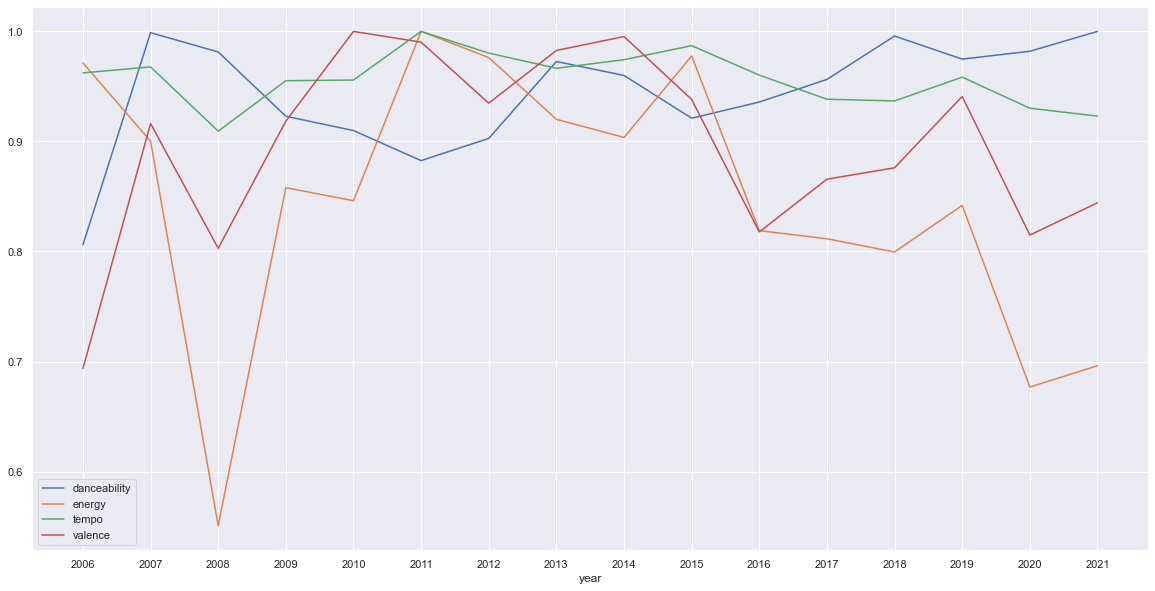

In [19]:
pv2 = pd.pivot_table(df, index='year', values=['danceability', 'energy', 'tempo', 'valence'])[1:]
# , 'energy', 'key', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo
ax = (pv2 / pv2.max(0)).plot(figsize=(20, 10))
ax.set_xticks(pv2.index)
plt.show()